## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import json as json
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

#Display the data table for preview
mouse_study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()
total_mice = mouse_study["Mouse ID"].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID(done simultaneously).
mouse_summary = mouse_study.drop_duplicates(subset = ['Mouse ID', 'Timepoint'],
keep= 'first').reset_index(drop = True)
display(mouse_summary)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
mouse_summary = pd.DataFrame(mouse_summary)
mouse_summary.head(124)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
119,y793,Capomulin,Male,17,17,20,40.716428,2
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_bool = mouse_study.duplicated(subset=['Mouse ID','Timepoint'], keep='first')
duplicated = mouse_study.loc[duplicate_bool == True]

duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Already done, clean df: mouse_summary

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_summary["Mouse ID"].nunique()
total_mice = mouse_summary["Mouse ID"].nunique()
total_mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Print list of drugs
List_drugs= mouse_summary['Drug Regimen'].unique()
List_drugs.sort()
print(List_drugs)

['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']


In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 

In [10]:
# Calculating mean tumor volume(mm3) per drug
tumor_volume = mouse_summary.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_volume_mean = pd.DataFrame(tumor_volume)
tumor_volume_mean

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [11]:
# Calculating median tumor volume(mm3) per drug
tumor_volume = mouse_summary.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_median = pd.DataFrame(tumor_volume)
tumor_volume_median

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [12]:
# Calculating variance of tumor volume(mm3) per drug
tumor_volume = mouse_summary.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_variance = pd.DataFrame(tumor_volume)
tumor_volume_variance

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.138803
Ramicane,23.486704
Stelasyn,59.450562


In [13]:
# Calculating standard deviation of tumor volume(mm3) per drug
tumor_volume = mouse_summary.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_standard_deviation  = pd.DataFrame(tumor_volume)
tumor_volume_standard_deviation 

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308
Stelasyn,7.710419


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
mask = mouse_summary['Drug Regimen'] == 'Capomulin'
mouse_summary[mask]
Capomulin = mouse_summary[mask]
Capomulin_df = pd.DataFrame(Capomulin["Tumor Volume (mm3)"].describe())
Capomulin_df

,Tumor Volume (mm3)
count,230.000000
mean,40.675741
std,4.994774
min,23.343598
25%,37.685933
50%,41.557809
75%,45.000000
max,48.158209


In [15]:
mask = mouse_summary['Drug Regimen'] == 'Ceftamin'
mouse_summary[mask]
Ceftamin = mouse_summary[mask]
Ceftamin_df = pd.DataFrame(Ceftamin["Tumor Volume (mm3)"].describe())
Ceftamin_df

,Tumor Volume (mm3)
count,178.000000
mean,52.591172
std,6.268188
min,45.000000
25%,47.208427
50%,51.776157
75%,56.801438
max,68.923185


In [16]:
mask = mouse_summary['Drug Regimen'] == 'Infubinol'
mouse_summary[mask]
Infubinol = mouse_summary[mask]
Infubinol_df = pd.DataFrame(Infubinol["Tumor Volume (mm3)"].describe())
Infubinol_df

,Tumor Volume (mm3)
count,178.000000
mean,52.884795
std,6.567243
min,36.321346
25%,47.312353
50%,51.820584
75%,57.314444
max,72.226731


In [17]:
mask = mouse_summary['Drug Regimen'] == 'Ketapril'
mouse_summary[mask]
Ketapril = mouse_summary[mask]
Ketapril_df = pd.DataFrame(Ketapril["Tumor Volume (mm3)"].describe())
Ketapril_df

,Tumor Volume (mm3)
count,188.000000
mean,55.235638
std,8.279709
min,45.000000
25%,48.232987
50%,53.698743
75%,60.870951
max,78.567014


In [18]:
mask = mouse_summary['Drug Regimen'] == 'Naftisol'
mouse_summary[mask]
Naftisol = mouse_summary[mask]
Naftisol_df = pd.DataFrame(Naftisol["Tumor Volume (mm3)"].describe())
Naftisol_df

,Tumor Volume (mm3)
count,186.000000
mean,54.331565
std,8.134708
min,45.000000
25%,47.285874
50%,52.509285
75%,59.963034
max,76.668817


In [19]:
mask = mouse_summary['Drug Regimen'] == 'Placebo'
mouse_summary[mask]
Placebo = mouse_summary[mask]
Placebo_df = pd.DataFrame(Placebo["Tumor Volume (mm3)"].describe())
Placebo_df

,Tumor Volume (mm3)
count,181.000000
mean,54.033581
std,7.821003
min,45.000000
25%,47.459053
50%,52.288934
75%,59.916934
max,73.212939


In [20]:
mask = mouse_summary['Drug Regimen'] == 'Propriva'
mouse_summary[mask]
Propriva = mouse_summary[mask]
Propriva_df = pd.DataFrame(Propriva["Tumor Volume (mm3)"].describe())
Propriva_df

,Tumor Volume (mm3)
count,156.000000
mean,52.393463
std,6.568014
min,45.000000
25%,47.046068
50%,50.909965
75%,56.491585
max,72.455421


In [21]:
mask = mouse_summary['Drug Regimen'] == 'Ramicane'
mouse_summary[mask]
Ramicane = mouse_summary[mask]
Ramicane_df = pd.DataFrame(Ramicane["Tumor Volume (mm3)"].describe())
Ramicane_df

,Tumor Volume (mm3)
count,228.000000
mean,40.216745
std,4.846308
min,22.050126
25%,36.674635
50%,40.673236
75%,45.000000
max,47.622816


In [22]:
mask = mouse_summary['Drug Regimen'] == 'Stelasyn'
mouse_summary[mask]
Stelasyn = mouse_summary[mask]
Stelasyn_df = pd.DataFrame(Stelasyn["Tumor Volume (mm3)"].describe())
Stelasyn_df

,Tumor Volume (mm3)
count,181.000000
mean,54.233149
std,7.710419
min,45.000000
25%,48.047139
50%,52.431737
75%,58.719297
max,75.123690


In [23]:
mask = mouse_summary['Drug Regimen'] == 'Zoniferol'
mouse_summary[mask]
Zoniferol = mouse_summary[mask]
Zoniferol_df = pd.DataFrame(Zoniferol["Tumor Volume (mm3)"].describe())
Zoniferol_df

,Tumor Volume (mm3)
count,182.000000
mean,53.236507
std,6.966589
min,45.000000
25%,47.337876
50%,51.818479
75%,57.954259
max,73.324432


In [24]:
tumor_summary = mouse_summary.groupby(['Drug Regimen'])
# Assemble the resulting series into a single summary dataframe.

tumor_volume_mean = tumor_summary['Tumor Volume (mm3)'].mean()
tumor_volume_median = tumor_summary['Tumor Volume (mm3)'].median()
tumor_volume_variance = tumor_summary['Tumor Volume (mm3)'].var()
tumor_std = tumor_summary['Tumor Volume (mm3)'].std()
tumor_volume_standard_error_mean = tumor_summary['Tumor Volume (mm3)'].sem()



tumor_summary = pd.DataFrame({
                        "Mean": tumor_volume_mean,
                        "Median" : tumor_volume_median,
                        "Variance" : tumor_volume_variance,
                        "Standard Deviation" : tumor_std,
                        "SEM" : tumor_volume_standard_error_mean
                        })
tumor_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Filter the DataFrame down only to those columns to chart
drugpoints = mouse_summary.groupby(['Drug Regimen'])['Timepoint'].count()
drugpoints_df = pd.DataFrame(drugpoints)
drugpoints_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


## Bar and Pie Charts

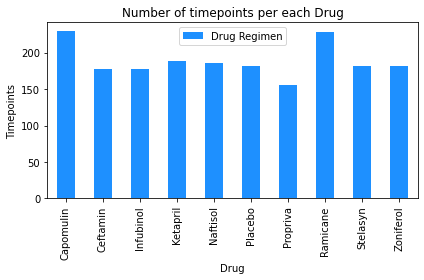

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create new DataFrame
drug_summary = mouse_summary.groupby('Drug Regimen')
drug_summary = pd.DataFrame(drug_summary['Drug Regimen'].count())


# Create a bar chart
Timepoint_chart = drug_summary.plot(kind='bar', title="Number of timepoints per each Drug", color="dodgerblue")

# Set the xlabel and ylabel using class methods
Timepoint_chart.set_xlabel("Drug")
Timepoint_chart.set_ylabel("Timepoints")
plt.tight_layout()


plt.show()

In [27]:
# Create new DataFrame
drugpoints = mouse_summary.groupby(['Drug Regimen'])['Timepoint'].count()
drugpoints_df = pd.DataFrame(drugpoints)
drugpoints_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


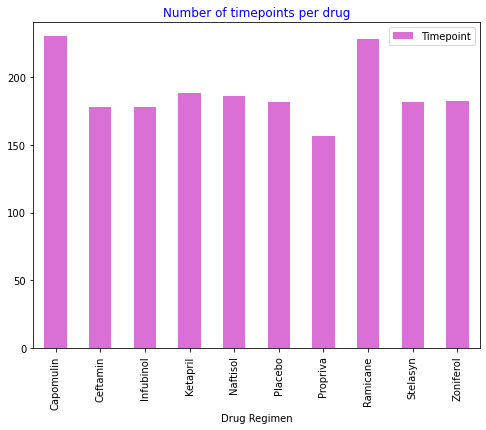

<Figure size 432x288 with 0 Axes>

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugpoints_df.plot(kind="bar", figsize=(8,6), color="orchid" )

# Set a title
plt.title("Number of timepoints per drug", color="blue")
plt.ylim(0, max(drugpoints_df["Timepoint"])+10)
plt.show()
plt.tight_layout()

In [29]:
# Create new dataframe, counting mice of each gender
gender = mouse_summary.groupby('Sex')
gender_df_count = pd.DataFrame(gender['Sex'].count())
gender_df_count = gender_df_count.copy().rename(columns={ 'Sex': 'Number_mice'})
gender_df_count.head()


,Number_mice
Sex,
Female,930
Male,958


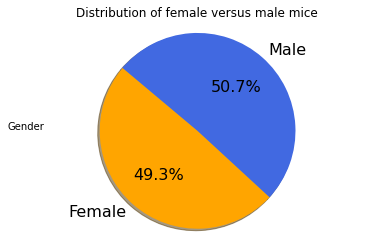

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
# Create a pie chart based on gender_df
gender_df_count.plot(kind='pie', y='Number_mice', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["orange", "royalblue",],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.ylabel("Gender", rotation= 0)
plt.show()


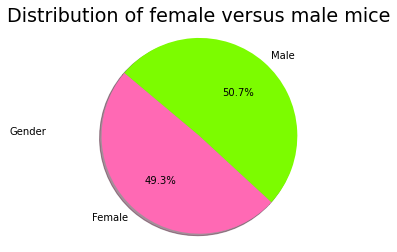

In [31]:
# Get Labels for our pie chart from the index values of the groupby dataframe
genders = list(gender_df_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_df_count['Number_mice']

# The colors of each section of the pie chart
colors = ["hotpink", "lawngreen"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Gender")
plt.axis("equal")
plt.ylabel("Gender", rotation= 0)
plt.savefig("../Images/working_file-3.current.ipynb.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 'Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'

#Create new DataFrame, holding only endpoint tumor sizes(mm3)
timepoint_df = mouse_summary.groupby(["Mouse ID"])["Timepoint"].max()
timepoint_df = timepoint_df.reset_index()
timepoint_df.head()

# Merge it with the original dataframe to get the tumor volume at the endpoint
timepoint_max_df = pd.merge(mouse_summary, timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
timepoint_max_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [33]:
# Create a list, holding all four drug names
list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
print(list)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']


In [34]:
# Create empty lists for each of the drugs
Capomulin_list = []
Ceftamin_list = []
Infubinol_list = []
Ramicane_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, row in timepoint_max_df.iterrows():
        if row["Drug Regimen"] == 'Capomulin':
            Capomulin_list.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == 'Ceftamin':
            Ceftamin_list.append(row['Tumor Volume (mm3)']) 
        if row["Drug Regimen"] == 'Infubinol':
            Infubinol_list.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == 'Ramicane':
            Ramicane_list.append(row['Tumor Volume (mm3)'])            
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
#created a data frame with the tumor data of the drugs listed.
drug_tx = pd.DataFrame({"Capomulin": Capomulin_list,
                       "Ceftamin": Ceftamin_list,
                       "Infubinol": Infubinol_list,
                       "Ramicane": Ramicane_list
                       })
    
endpoint_summary = pd.DataFrame(drug_tx)
endpoint_summary






,Capomulin,Ceftamin,Infubinol,Ramicane
0,38.982878,62.999356,67.973419,38.407618
1,38.939633,45.000000,65.525743,43.047543
2,30.485985,56.057749,57.031862,38.810366
3,37.074024,55.742829,66.083066,32.978522
4,40.159220,48.722078,72.226731,38.342008
5,47.685963,47.784682,36.321346,33.397653
6,37.311846,61.849023,60.969711,37.311236
7,38.125164,68.923185,62.435404,40.659006
8,38.753265,67.748662,60.918767,29.128472
9,41.483008,57.918381,67.289621,33.562402


In [35]:
Capomulin_max = endpoint_summary.iloc[:,0].max()
Capomulin_min = endpoint_summary.iloc[:,0].min()
print(Capomulin_max)
print(Capomulin_min)

47.68596303
23.34359787


In [36]:
Ceftamin_max = endpoint_summary.iloc[:,1].max()
Ceftamin_min = endpoint_summary.iloc[:,1].min()
print(Ceftamin_max)
print(Ceftamin_min)

68.92318457
45.0


In [37]:
Infubinol_max = endpoint_summary.iloc[:,2].max()
Infubinol_min = endpoint_summary.iloc[:,2].min()
print(Infubinol_max)
print(Infubinol_min)

72.2267309
36.3213458


In [38]:
Ramicane_max = endpoint_summary.iloc[:,3].max()
Ramicane_min = endpoint_summary.iloc[:,3].min()
print(Ramicane_max)
print(Ramicane_min)

45.22086888
22.05012627


In [39]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Select the first quantile
IQR_list = []

Q1 = endpoint_summary['Capomulin'].quantile(.25)

# Select the third quantile
Q3 = endpoint_summary['Capomulin'].quantile(.75)

Capomulin_IQR = Q3-Q1

Q1 = endpoint_summary['Ceftamin'].quantile(.25)

# Select the third quantile
Q3 = endpoint_summary['Ceftamin'].quantile(.75)

Ceftamin_IQR = Q3-Q1

Q1 = endpoint_summary['Infubinol'].quantile(.25)

# Select the third quantile
Q3 = endpoint_summary['Infubinol'].quantile(.75)

Infubinol_IQR = Q3-Q1

Q1 = endpoint_summary['Ramicane'].quantile(.25)

# Select the third quantile
Q3 = endpoint_summary['Ramicane'].quantile(.75)

Ramicane_IQR = Q3-Q1

print(f"Capomulin IQR: ", Capomulin_IQR)
print(f"Ceftamin IQR: ", Ceftamin_IQR )
print(f"Infubinol IQR ", Infubinol_IQR)
print(f"Ramicane IQ ", Ramicane_IQR)

Capomulin IQR:  7.781863460000004
Ceftamin IQR:  15.577752179999997
Infubinol IQR  11.477135160000003
Ramicane IQ  9.098536719999998


In [40]:
    # Determine outliers using upper and lower bounds
        # Could this be done with a for loop?
#calculations of quartile, quantile, etc for each of the drugs
Capomulin_quartiles = endpoint_summary[list[0]].quantile([.25, .5, .75])
Capomulin_low = Capomulin_quartiles[.25]
Capomulin_med = Capomulin_quartiles[.5]
Capomulin_high = Capomulin_quartiles[.75]
Capomulin_IQR
Capomulin_high_boundary = Capomulin_low - (1.5*Capomulin_IQR)
Capomulin_low_boundary = Capomulin_high + (1.5*Capomulin_IQR)
Capomulin_max
Capomulin_min

Ceftamin_quartiles = endpoint_summary[list[1]].quantile([.25, .5, .75])
Ceftamin_low = Ceftamin_quartiles[.25]
Ceftamin_med = Ceftamin_quartiles[.5]
Ceftamin_high = Ceftamin_quartiles[.75]
Ceftamin_IQR
Ceftamin_high_boundary = Ceftamin_low - (1.5*Ceftamin_IQR)
Ceftamin_low_boundary = Ceftamin_high + (1.5*Ceftamin_IQR)
Ceftamin_max
Ceftamin_min

Infubinol_quartiles = endpoint_summary[list[2]].quantile([.25, .5, .75])
Infubinol_low = Infubinol_quartiles[.25]
Infubinol_med = Infubinol_quartiles[.5]
Infubinol_high = Infubinol_quartiles[.75]
Infubinol_IQR
Infubinol_high_boundary = Infubinol_low - (1.5*Infubinol_IQR)
Infubinol_low_boundary = Infubinol_high + (1.5*Infubinol_IQR)
Infubinol_max
Infubinol_min

Ramicane_quartiles = endpoint_summary[list[2]].quantile([.25, .5, .75])
Ramicane_low = Ramicane_quartiles[.25]
Ramicane_med = Ramicane_quartiles[.5]
Ramicane_high = Ramicane_quartiles[.75]
Ramicane_IQR
Ramicane_high_boundary = Ramicane_low - (1.5*Ramicane_IQR)
Ramicane_low_boundary = Ramicane_high + (1.5*Ramicane_IQR)
Ramicane_max 
Ramicane_min

22.05012627

In [41]:

outliers = pd.DataFrame({'Drug': list,
                         'Lower Quartile':[Capomulin_low, Ceftamin_low, Infubinol_low, Ramicane_low],
                         'Upper Quartile':[Capomulin_high, Ceftamin_high, Infubinol_high, Ramicane_high],
                         'IQR':[Capomulin_IQR, Ceftamin_IQR, Infubinol_IQR, Ramicane_IQR],
                         'Median':[Capomulin_med, Ceftamin_med, Infubinol_med, Ramicane_med],
                        'Upper Bound': [Capomulin_high_boundary, Ceftamin_high_boundary, Infubinol_high_boundary, Ramicane_high_boundary],
                        'Lower Bound': [Capomulin_low_boundary, Ceftamin_low_boundary, Infubinol_low_boundary, Ramicane_low_boundary],
                        'Max': [Capomulin_max, Ceftamin_max, Infubinol_max, Ramicane_max],
                         'Min': [Capomulin_min, Ceftamin_min, Infubinol_min, Ramicane_min]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446,72.226731,36.321346
Ramicane,54.048608,65.525743,9.098537,60.165180,40.400803,79.173548,45.220869,22.050126


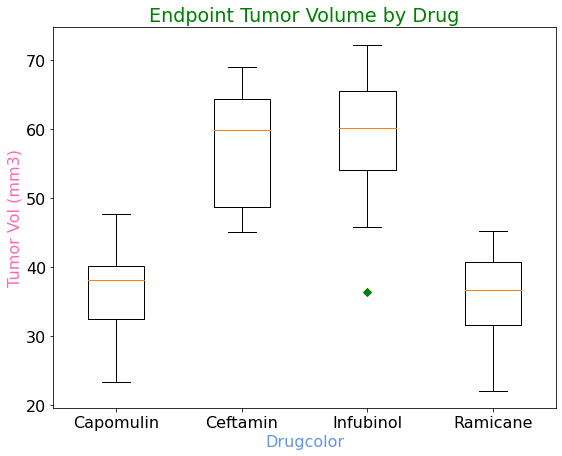

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot_list = [endpoint_summary[list[0]],
                endpoint_summary[list[1]],
                endpoint_summary[list[2]],
                endpoint_summary[list[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Endpoint Tumor Volume by Drug', color = "green") #set title
ax.set_xlabel('Drugcolor', color = "cornflowerblue") # set x label
ax.set_ylabel('Tumor Vol (mm3)', color = "hotpink") #set y lable
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], list) # set labels of each boxplot
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

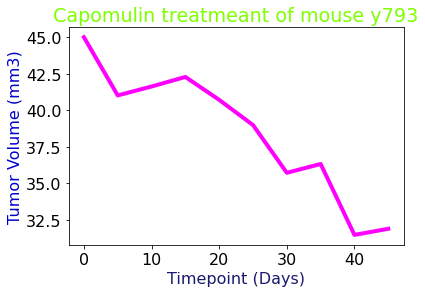

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.title('Capomulin treatmeant of mouse y793', color="chartreuse")

Capomulin_df = mouse_summary.loc[mouse_summary["Mouse ID"] == "y793",:]
Capomulin_df

x_axis = Capomulin_df["Timepoint"] 

y_axis = Capomulin_df["Tumor Volume (mm3)"] 

plt.plot(x_axis, y_axis,linewidth=4, markersize=10,color="magenta" ) 
plt.xlabel('Timepoint (Days)', color="midnightblue")
plt.ylabel('Tumor Volume (mm3)', color="mediumblue", rotation= 90)

plt.savefig('linechart')
plt.show()


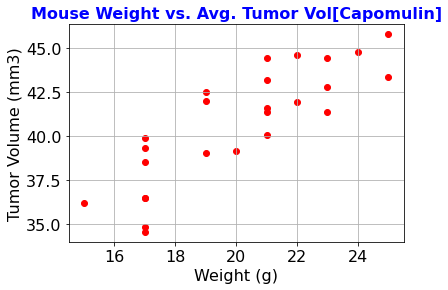

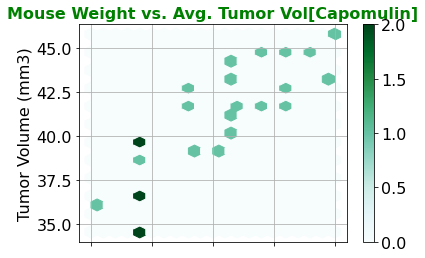

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#mouse_summary = mouse_summary.set_index('Mouse ID')

capomulin = mouse_summary.loc[mouse_summary["Drug Regimen"] == "Capomulin"]
#capomulin

weight = capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()
#weight
volume = capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
#volume

df = pd.DataFrame({"Weight (g)": weight,
                   "Tumor Volume (mm3)": volume})
#df

plt.scatter(weight, volume, marker = "o", facecolors = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Avg. Tumor Vol[Capomulin]", fontsize = 16, fontweight = "bold", color = "blue")
plt.grid()
plt.show()

df.plot.hexbin(x='Weight (g)', y='Tumor Volume (mm3)', gridsize= 20)
plt.title("Mouse Weight vs. Avg. Tumor Vol[Capomulin]", fontsize = 16, fontweight = "bold", color = "green")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=st.pearsonr(weight,volume)[0]
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.841936342469472


In [46]:
Capomulin_df['Weight (g)']

115    17
116    17
117    17
118    17
119    17
120    17
121    17
122    17
123    17
124    17
Name: Weight (g), dtype: int64

In [47]:
# calculating linear regression values using st.linregress() function passing parameters from the capavg dataframe
model=st.linregress(weight, volume)
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

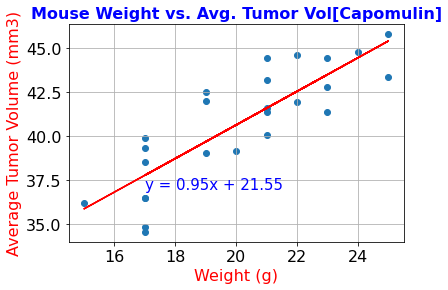

In [50]:
# Add the linear regression equation and line to plot
x_values = weight
y_values = volume

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)', color= "red")
plt.ylabel('Average Tumor Volume (mm3)', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight vs. Avg. Tumor Vol[Capomulin]", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear')
plt.grid()
plt.show()